In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
plt.rcParams.update({'font.size': 15}) 

# Kuramoto system

$$ \frac{\partial\phi(x, t)}{\partial t} = \omega - B\sum_{x'=0}^{2\pi}G(x - x')(\sin(\phi(x, t) - \phi(x', t) + \alpha)),$$
	Here $x \in [0, 2\pi]$ is a discrete coordinate of oscillator in the ring. The number of oscillators $N$ is equal 10. The coupling $G(x - x')$ between oscillators $x$ and $x'$ is symmetrical and defines as follows:

$$ G(x - x') = \frac{1}{2\pi} \left(1 + A\cos (x - x')\right) $$	

In [3]:
def kuramoto(phi, N, alpha, A, B, omega, noise=0):
    x = np.arange(N) * 2 * np.pi / N
    G = 1 + A * np.cos(x[:, None] - x[None, :])
    
    dphi = omega - B * 1 / (2 * np.pi * N) * np.sum(G * np.sin(phi[:, None] - phi[None, :] + alpha), 1) + noise
    
    return dphi

In [4]:
STEP = 0.1
T = 1000

N = 10
phi0 = np.random.randn(N) * 2 * np.pi

# Case of synchronization

In [5]:
B = 5
omega = 0
alpha = np.pi / 2 - 0.1
A = 0.1 

args = (N, alpha, A, B, omega)

In [6]:
phi = [phi0]

for t in np.arange(0, T, STEP):
    
    dphi = kuramoto(phi[-1], *args)
    phi.append(phi[-1] + dphi * STEP)
    
phi = np.array(phi) 

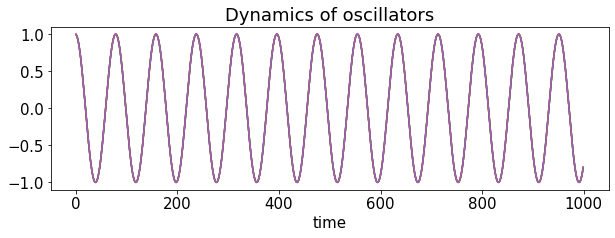

In [7]:
phi2plot = np.sin(phi) 

plt.figure(figsize=(10, 3))
plt.plot(phi2plot[-1000:, :5])
plt.xlabel('time')
plt.title('Dynamics of oscillators')
plt.show()

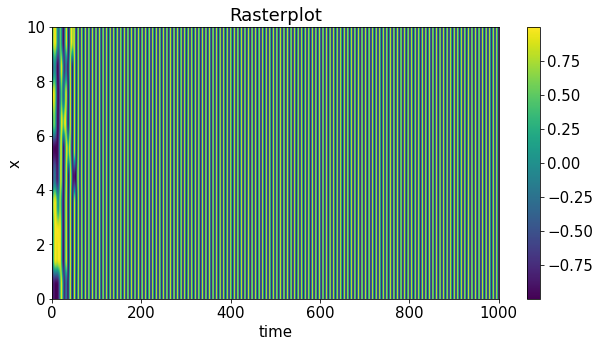

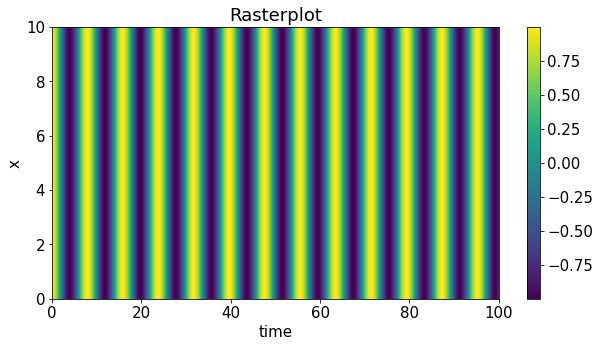

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(phi2plot[:, :].T, aspect='auto',
           extent=[0, phi2plot.shape[0] * STEP, 0, phi2plot.shape[1]]
          )          
plt.ylabel('x')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(phi2plot[-1000:, :].T, aspect='auto',
           extent=[0, 1000 * STEP, 0, phi2plot.shape[1]]
          )          
plt.ylabel('x')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

In [9]:
def get_freqs(s, thr, step=0.1):
    peaks = (s[1:-1, :] < thr) & (s[2:, :] > thr)
    return peaks.mean(axis=0) / step

freqs = [0.12024048 0.12024048 0.12024048 0.12024048 0.12024048 0.12024048
 0.12024048 0.12024048 0.12024048 0.12024048]


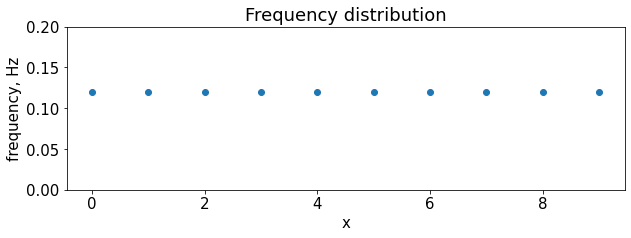

In [10]:
signal = np.sin(phi[-1000:])
freqs = get_freqs(signal, 0.5, STEP)

print(f'freqs = {freqs}')

plt.figure(figsize=(10, 3))
plt.scatter(np.arange(N), freqs)
plt.xlabel('x')
plt.ylabel('frequency, Hz')
plt.title('Frequency distribution')
plt.ylim(0, 0.2)
plt.show()

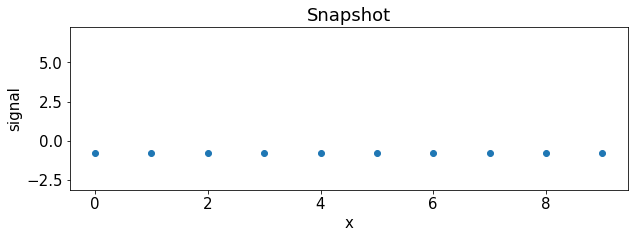

In [11]:
plt.figure(figsize=(10, 3))
plt.scatter(np.arange(N), phi2plot[-1, :])
plt.xlabel('x')
plt.ylabel('signal')
plt.title('Snapshot')
plt.ylim(-np.pi, np.pi * 2 + 1)
plt.show()

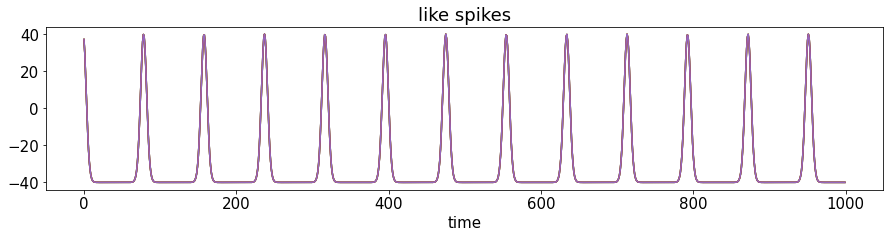

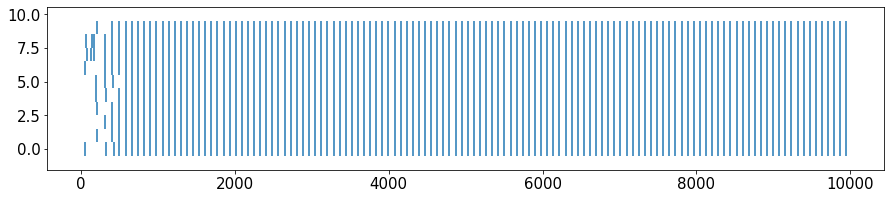

In [12]:
s = np.exp(10 * np.sin(phi)) 
s = s / np.max(s) * 80 - 40

plt.figure(figsize=(15, 3))
plt.plot(s[-1000:, :5])
plt.xlabel('time')
plt.title('like spikes')
plt.show()

thr = 35
spikes = (s[1:-1, :] < thr) & (s[2:, :] > thr)

events = [np.where(s)[0] for s in spikes.T]

plt.figure(figsize=(15, 3))
plt.eventplot(events)
plt.show()

### Order parameter:

$$ r =  |\frac{1}{N} \sum_{i}^N e^{i\phi_i}| $$

In [13]:
def order_parameter(phi, N):
    r = np.abs(1 / N * np.sum(np.exp(1j * phi), axis=1))
    return r

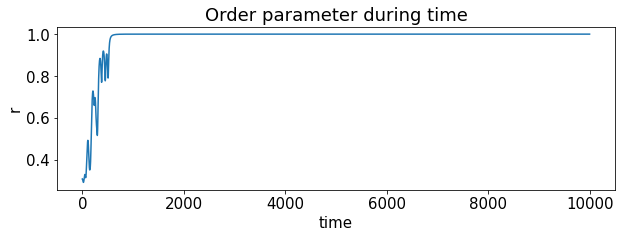

Order parameter is 1.0


In [14]:
r = order_parameter(phi, N)

plt.figure(figsize=(10, 3))
plt.plot(r)
plt.title('Order parameter during time')
plt.xlabel('time')
plt.ylabel('r')
plt.show()

print(f'Order parameter is {np.sum(r[-500:]) / len(r[-500:])}')

# Asynchronous state

In [15]:
B = 0
noise = 10 * STEP ** .5 * np.random.rand(N) 

args = (N, alpha, A, B, omega, noise)

In [16]:
phi = [phi0]

for t in np.arange(0, T, STEP):
    phi_curr = phi[-1].copy()
    
    dphi = kuramoto(phi_curr, *args)
    phi.append(phi_curr + dphi * STEP)
    
phi = np.array(phi) 

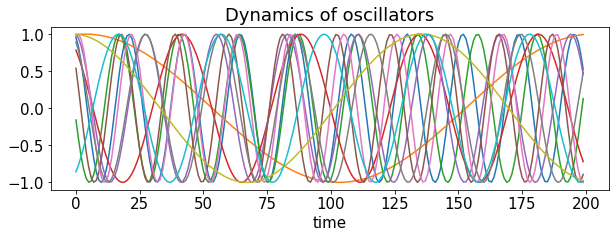

In [17]:
phi2plot = np.sin(phi)[-2000:, :]
# phi2plot = phi [-2000:, :] % (2 * np.pi)

plt.figure(figsize=(10, 3))
plt.plot(phi2plot[-200:, :])
plt.xlabel('time')
plt.title('Dynamics of oscillators')
plt.show()

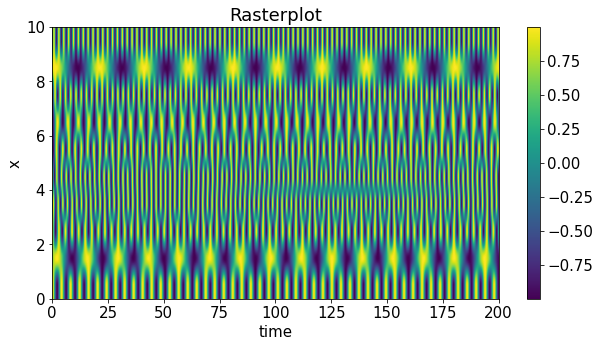

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(phi2plot.T, aspect='auto',
           extent=[0, phi2plot.shape[0] * STEP, 0, phi2plot.shape[1]]
          )          
plt.ylabel('x')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

[0.46092184 0.0501002  0.42084168 0.21042084 0.36072144 0.47094188
 0.48096192 0.33066132 0.07014028 0.250501  ]


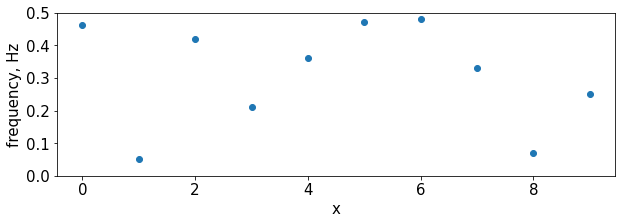

In [19]:
signal = np.sin(phi[-1000:])
freqs = get_freqs(signal, 0.5, STEP)

print(freqs)

plt.figure(figsize=(10, 3))
plt.scatter(np.arange(N), freqs)
plt.xlabel('x')
plt.ylabel('frequency, Hz')
plt.ylim(0, 0.5)
plt.show()

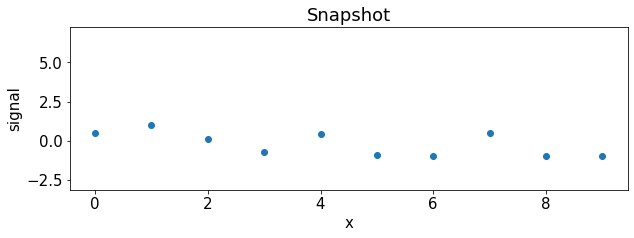

In [20]:
plt.figure(figsize=(10, 3))
plt.scatter(np.arange(N), phi2plot[-1, :])
plt.xlabel('x')
plt.ylabel('signal')
plt.title('Snapshot')
plt.ylim(-np.pi, np.pi * 2 + 1)
plt.show()

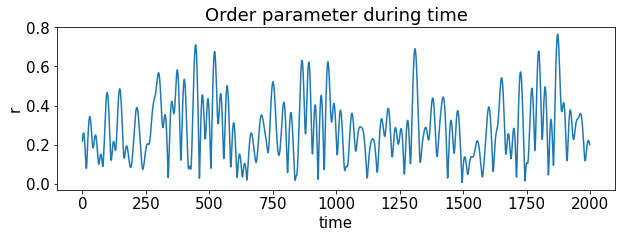

Order parameter is 0.28090318515695584


In [21]:
r = order_parameter(phi[-2000:, :], N)

plt.figure(figsize=(10, 3))
plt.plot(r)
plt.title('Order parameter during time')
plt.xlabel('time')
plt.ylabel('r')
plt.show()

print(f'Order parameter is {np.sum(r) / len(r)}')

# Chimera state case:

In [22]:
A = 0.8
B = 5

args = (N, alpha, A, B, omega)

In [23]:
phi = [phi0]

for t in np.arange(0, T, STEP):
    phi_curr = phi[-1].copy()
    
    dphi = kuramoto(phi_curr, *args)
    phi.append(phi_curr + dphi * STEP)
    
phi = np.array(phi)

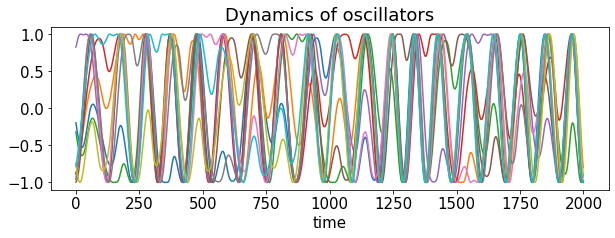

In [24]:
phi2plot = np.sin(phi)

plt.figure(figsize=(10, 3))
plt.plot(phi2plot[-2000:, :])
plt.xlabel('time')
plt.title('Dynamics of oscillators')
plt.show()

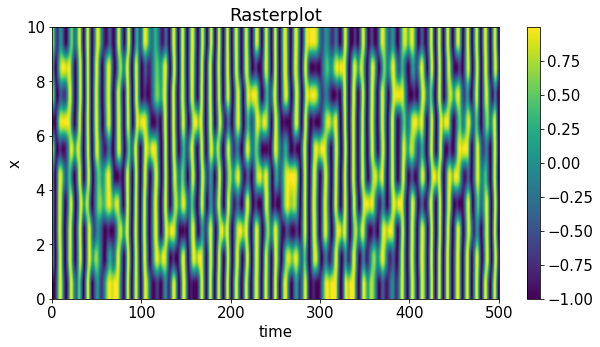

In [25]:
phi2plot = np.sin(phi[-5000:]) 

plt.figure(figsize=(10, 5))
plt.imshow(phi2plot.T, aspect='auto',
           extent=[0, phi2plot.shape[0] * STEP, 0, phi2plot.shape[1]]
          )          
plt.ylabel('x')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

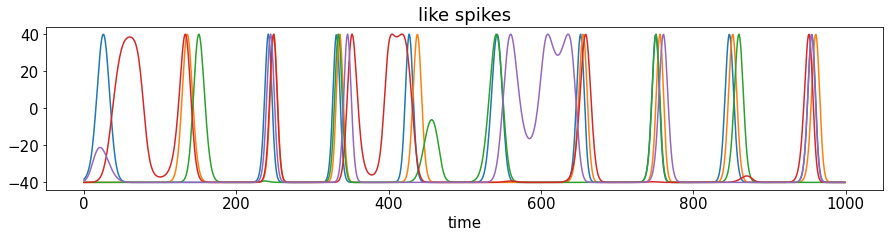

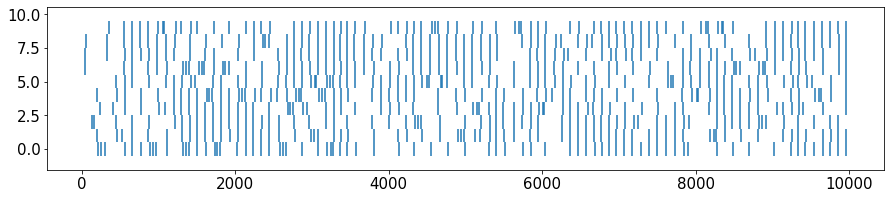

In [26]:
s = np.exp(10 * np.sin(phi)) 
s = s / np.max(s) * 80 - 40

plt.figure(figsize=(15, 3))
plt.plot(s[-1000:, :5])
plt.xlabel('time')
plt.title('like spikes')
plt.show()

thr = 35
spikes = (s[1:-1, :] < thr) & (s[2:, :] > thr)
events = [np.where(s)[0] for s in spikes.T]
plt.figure(figsize=(15, 3))
plt.eventplot(events)
plt.show()

[0.08016032 0.09018036 0.07014028 0.07014028 0.06012024 0.06012024
 0.08016032 0.1002004  0.09018036 0.1002004 ]


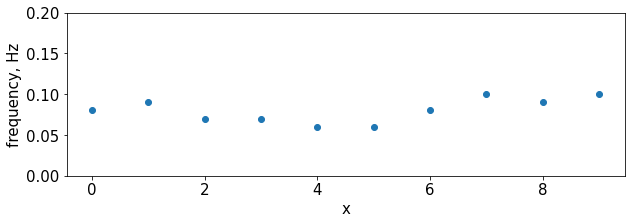

In [27]:
signal = np.exp(10 * np.sin(phi[-1000:]))
freqs = get_freqs(signal, 0.99, STEP)

print(freqs)

plt.figure(figsize=(10, 3))
plt.scatter(np.arange(N), freqs)
plt.xlabel('x')
plt.ylabel('frequency, Hz')
plt.ylim(0, 0.2)
plt.show()

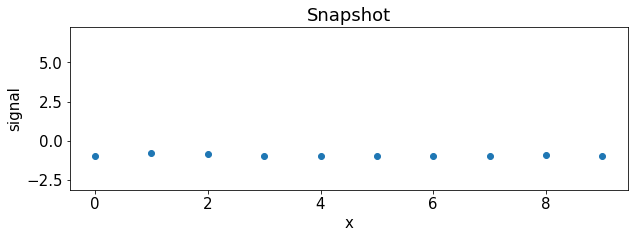

In [28]:
plt.figure(figsize=(10, 3))
plt.scatter(np.arange(N), phi2plot[-1, :])
plt.xlabel('x')
plt.ylabel('signal')
plt.title('Snapshot')
plt.ylim(-np.pi, np.pi * 2 + 1)
plt.show()

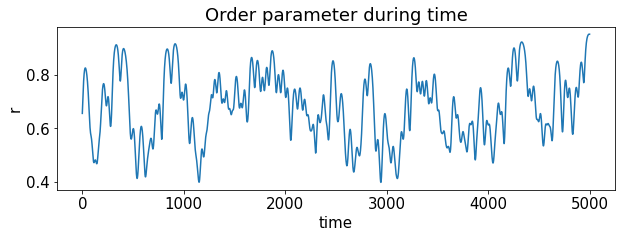

Order parameter is 0.6771982282530616


In [29]:
r = order_parameter(phi[-5000:, :], N)

plt.figure(figsize=(10, 3))
plt.plot(r)
plt.title('Order parameter during time')
plt.xlabel('time')
plt.ylabel('r')
plt.show()

print(f'Order parameter is {np.sum(r) / len(r)}')